### Assignment 8. 
For this assignment , we will use the college scorecard dataset.   
1. You are required to use deepnote.com.   
2. You will upload the zip file (300 some MB) to deepnote or use Linux Terminal command line wget command.  
3. You will unzip the file using Linux Terminal unzip command.  
4. For visualization, you can use Matplotlib, Seaborn, or Plotly Express.  




In [57]:
# 1 - Import necessary libraries
import pandas as pd
import numpy as np 
from matplotlib import pyplot as pyplot
import os, random 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import statistics as st

In [2]:
current_folder = os.getcwd()
print(current_folder)

/work


In [3]:
files_list = os.listdir()
print(files_list)

['Raw Data Files', '__MACOSX', '.deepnote', 'Assignment8_KoushikKumarReddyAjjuguttu.ipynb', 'init.ipynb', 'data']


In [4]:
files_list = os.listdir('./data/input/')
files_list

['FieldOfStudyData1516_1617_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2012_13_PP.csv',
 'Most-Recent-Cohorts-Field-of-Study.csv',
 'FieldOfStudyData1617_1718_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2003_04_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2001_02_PP.csv',
 'data.yaml',
 'MERGED2008_09_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2004_05_PP.csv',
 'Most-Recent-Cohorts-All-Data-Elements.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2011_12_PP.csv',
 'Crosswalks.zip',
 'MERGED2018_19_PP.csv',
 'MERGED2006_07_PP.csv']

In [5]:
df = pd.read_csv("./data/input/MERGED2009_10_PP.csv", usecols=['TUITIONFEE_IN'])
df.head()

,TUITIONFEE_IN
0,NaN
1,4692.0
2,5096.0
3,8000.0
4,6510.0


In [6]:
# 2 - Retrieve the names of the 22 files and assign them to a List variable
# You would need to filter out other files
# Display the names of these 22 files

#file_list = os.listdir('./data/input')
#file_list
merged_files = [file for file in files_list if 'MERGED' in file]
merged_files


['MERGED1999_00_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2006_07_PP.csv']

In [43]:
# 3 - Write code to randomly select one file name out of the 22 files names. 
# Hint: generate a random integer between 0 and 21 first
# Display the file name
random_file=random.choice(os.listdir("./data/input"))
random_file

'MERGED2008_09_PP.csv'

In [44]:
# 4 - Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")
# from this file into a data frame aand display use info() function to display a summary information

df = pd.read_csv('./data/input/MERGED2008_09_PP.csv', usecols=['INSTNM','TUITIONFEE_IN'])
print(df)

                                                 INSTNM  TUITIONFEE_IN
0                    Community College of the Air Force            NaN
1                              Alabama A & M University         4072.0
2                   University of Alabama at Birmingham         4664.0
3                                    Amridge University         6600.0
4                   University of Alabama in Huntsville         5952.0
...                                                 ...            ...
7050            Texas Barber College - Branch Campus #1            NaN
7051            Texas Barber College - Branch Campus #2            NaN
7052  Texas Barber Colleges and Hairstyling Schools ...            NaN
7053            Texas Barber College - Branch Campus #5            NaN
7054  Texas Barber Colleges and Hairstyling Schools ...            NaN

[7055 rows x 2 columns]


In [48]:
# 5 - Find out how many observations have missing value.
df.isnull().sum()


INSTNM              0
TUITIONFEE_IN    2846
dtype: int64

In [49]:
df.shape

(7055, 2)

In [46]:
df.info()
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7055 entries, 0 to 7054
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         7055 non-null   object 
 1   TUITIONFEE_IN  4209 non-null   float64
dtypes: float64(1), object(1)
memory usage: 110.4+ KB

Hence there are no null values


In [50]:
# 6 - Drop those observations with missing value
# Disaply the number of observations afterward
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4209 entries, 1 to 7049
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         4209 non-null   object 
 1   TUITIONFEE_IN  4209 non-null   float64
dtypes: float64(1), object(1)
memory usage: 98.6+ KB


In [52]:
# 7 - Find out how many observations have 0 tution. 
null_tuition = df[df['TUITIONFEE_IN']==0]
null_tuition.shape

(5, 2)

In [53]:
null_tuition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 674 to 2891
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         5 non-null      object 
 1   TUITIONFEE_IN  5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 120.0+ bytes


In [54]:
# 8 - Drop those observations with 0 tuition
# Disaply the number of observations afterward
df = df[df['TUITIONFEE_IN']!=0]
df.shape

(4204, 2)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4204 entries, 1 to 7049
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         4204 non-null   object 
 1   TUITIONFEE_IN  4204 non-null   float64
dtypes: float64(1), object(1)
memory usage: 227.6+ KB


In [58]:
# 9 - Calculate and display the mean (average) of the tuitions of all the remaining observations 
average_fees = st.mean(df['TUITIONFEE_IN'])
print('The average tuituion fees is:', average_fees )

The average tuituion fees is: 11388.439581351095


In [67]:
# 10 - Randomly select just 1 observation from the data frame.
# Display the tuition of that observation. 
random_obs = df.sample()
random_obs


,INSTNM,TUITIONFEE_IN
2597,Berkeley College-New York,19050.0


In [69]:
# 11 - Calculate the different between the tuition of this observation and 
# the mean tuition off all observations calculated earlier.
# Display the difference
print(random_obs['TUITIONFEE_IN']-average_fees)

2597    7661.560419
Name: TUITIONFEE_IN, dtype: float64


In [ ]:
# 12 - Repeat 10 to 11 several times get the feel of the size of the difference in means

In [71]:
# 13 - Randomly select 20 observations, display the tuition of these observation. 
random_values = df.sample(20)
random_values

,INSTNM,TUITIONFEE_IN
6778,ITT Technical Institute-Madison,16356.0
5728,Vatterott College-Sunset Hills,10766.0
3672,Shippensburg University of Pennsylvania,7099.0
1996,Lake Michigan College,3105.0
2004,Rochester University,16610.0
1803,Assumption College,28851.0
5477,University of Phoenix-Sacramento Valley Campus,13950.0
538,San Joaquin Valley College-Visalia,12190.0
2078,Minnesota West Community and Technical College,4810.0
1384,Ellsworth Community College,3432.0


In [73]:
# 14 - Calculate and displat the mean tuition of these 20 observations
random_mean = st.mean(random_values['TUITIONFEE_IN'])
print('Random observations, avg tuition fee is :',random_mean)

Random observations, avg tuition fee is : 11385.9


In [76]:
# 15 - Calculate  the different between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference
difference = random_mean-average_fees
print(' Difference in avg tuition and mean tuition is: ',difference)

 Difference in avg tuiton and mean tuition is:  -2.5395813510949665


In [ ]:
# 16 - Repeat 13 to 15 several times and get the feel of the size of the difference in means 
# Compare these differences with the differences calculated earlier with just 1 observation
# Describe your hunch/conclusion


Write a function that take two input parameters:
- x (number of observations) 
- y (the name of the dataframe). 

The function will perform the following: 
- Randomly select x observations from y
- Calculate the mean of these x observations 
- Calculate the mean of all observations
- Calculate the difference between the two means 
- Return the difference

In [78]:
# 17 - write function Code here.
def mean_difference(x,y):
    random_values = y.sample(x)
    mean_random = st.mean(random_values['TUITIONFEE_IN'])
    mean = st.mean(y['TUITIONFEE_IN'])
    return abs(random_mean-mean)

In [81]:
# 18 - test the function by passing a sample size and the name of the dataframe
# Dsplay the return of the function
print('Mean of 30 samples is: ',mean_difference(30,df))

Mean of 30 samples is:  2.5395813510949665


In [82]:
# 19 - Create a list of sequence numbers from 1 to 50, name it "sample_sizes";
# display it to make sure its members are from 1 to 50
sample_sizes = [i for i in range(1,51)]
print(sample_sizes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [89]:
# 20 - Create an empty list and name it "means_diff" for differences of population mean and sample means;
# Loop through the list sample_sizes:
# For each element in the sample size list, obtain a random sample of that size from the data frame;
# Calculate the sample mean 
# Calculate the difference between the population mean and the sample mean
# Append the difference to the list "means_diff"
# Display the list "means_diff" after the loop is completed

def calculateMeanDifference(sample_sizes,df):
    means_diff = []
    mean_population = st.mean(df['TUITIONFEE_IN'])
    for i in sample_sizes:
        sample_df = df.sample(i)
        sample_mean = st.mean(sample_df['TUITIONFEE_IN'])
        means_diff.append(abs(sample_mean-mean_population))
    return means_diff
    
print('List of means_diff:')
means_diff = calculateMeanDifference(sample_sizes,df)
print(means_diff)



List of means_diff:
[1761.5604186489054, 7134.939581351095, 3862.1062480177616, 5887.689581351095, 3627.039581351095, 2097.1062480177607, 1952.7032757917623, 1434.8104186489054, 2729.449307537794, 988.3395813510942, 169.71230862382254, 3820.5604186489054, 753.8241967357098, 2536.011009922524, 1008.1729146844282, 381.6895813510946, 1130.4395813510946, 284.60624801776066, 3697.2972607541687, 1598.539581351095, 1285.4175615060485, 1384.9695095579955, 221.91784222066053, 44.6895813510946, 832.8395813510942, 665.4011198126336, 394.2641223526098, 2480.6318472203347, 892.6809606614388, 950.5729146844278, 2414.818483165034, 1131.7479186489054, 15.863448951935425, 463.3219342922712, 941.6967242082374, 1300.1159742044601, 1389.3314732429862, 3880.534102859432, 2703.7655468540343, 913.1604186489058, 140.75665452182693, 1580.012799601287, 1847.7884185603962, 312.01496410345135, 2124.0840257955388, 554.6787117858767, 1519.9502196489666, 475.16458531557146, 1471.4599895143601, 1234.4804186489055, 25

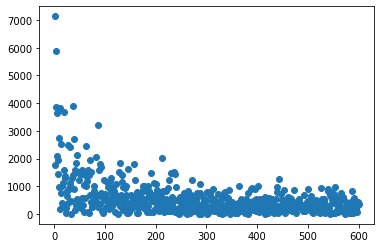

In [90]:
# 21 - Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough 
plt.scatter(sample_sizes,means_diff)

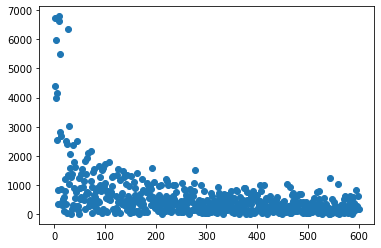

In [91]:
# 22 - repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000.
# and see how the plot looks. 
sample_sizes = [i for i in range(1,601)]
means_diff = calculateMeanDifference(sample_sizes,df)
plt.scatter(sample_sizes,means_diff)

In [ ]:
# The end - Give yourself a pat on the back!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b1ebc6a4-64fd-4fc2-95f5-c646733b35a9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>